In [2]:
#importing all libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#importing the dataset

url = "D:\Downloads\Project_1\Admission_Predict_Ver1.1.csv" 
# replace this URL with file location of where this file is stored on your computer
df = pd.read_csv(url)


print(df.keys())
df.tail()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [3]:
# The parameters for prediction are :
# 1.	GRE Scores ( out of 340 )
# 2.	TOEFL Scores ( out of 120 )
# 3.	University Rating ( out of 5 )
# 4.	Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# 5.	Undergraduate GPA ( out of 10 )
# 6.	Research Experience ( either 0 or 1 )
# 7.	Chance of Admit ( ranging from 0 to 1 )

#The target variable is = Chance of admit (gives the probability of admission between 0.0 and 1.0 )

# GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research' => are the x values or independent variables
#'Chance of Admit '  => is the dependent variabel which we are trying to predict.

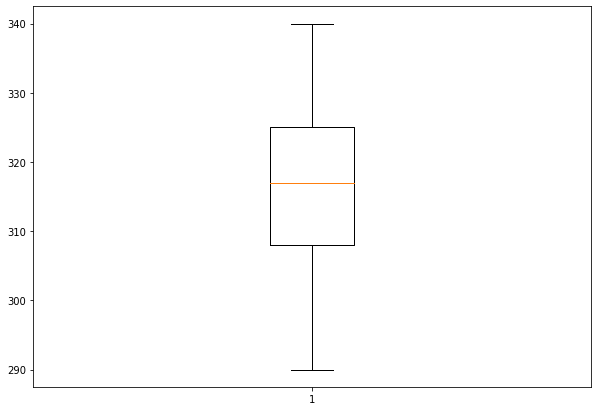

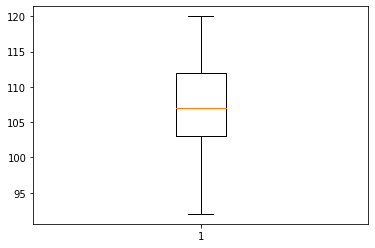

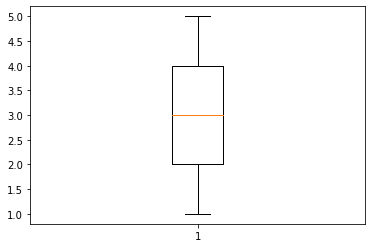

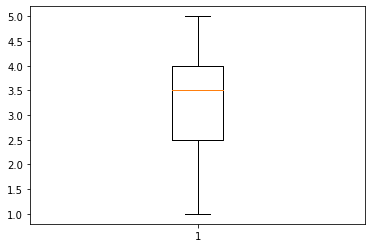

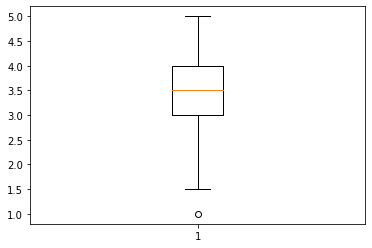

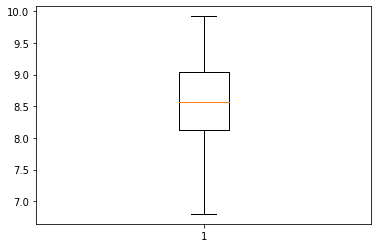

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize =(10, 7))
  
# Creating boxplots for each feature to check for outliers: - 

plt.boxplot(df['GRE Score'])
plt.show()

plt.boxplot(df['TOEFL Score'])
plt.show()

plt.boxplot(df['University Rating'])
plt.show()

plt.boxplot(df['SOP'])
plt.show()

plt.boxplot(df['LOR '])
plt.show()

plt.boxplot(df['CGPA'])
plt.show()


# as we can see only a single outlier was detected in LOR which can be ignored

C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


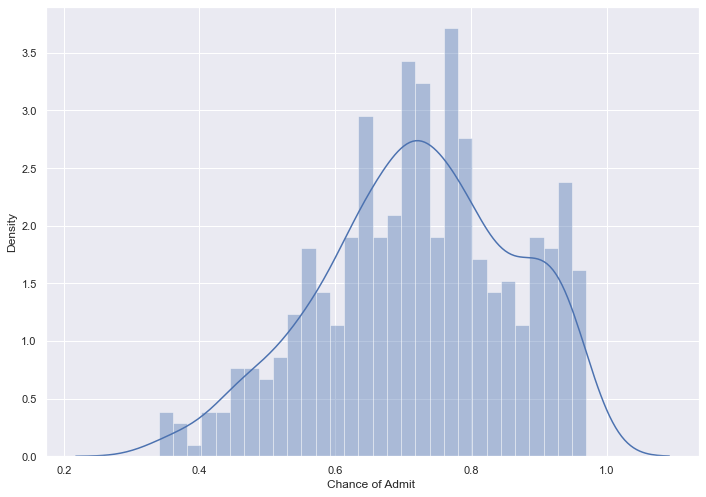

In [5]:
#EDA with distplot :-
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Chance of Admit '], bins=30)
plt.show()

In [6]:
from numpy import mean
from numpy import std

data_mean, data_std = mean(df['Chance of Admit ']), std(df['Chance of Admit '])
# identifying outliers

cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# printing count of outliers and non-outliers

outliers = [x for x in df['Chance of Admit '] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df['Chance of Admit '] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 500


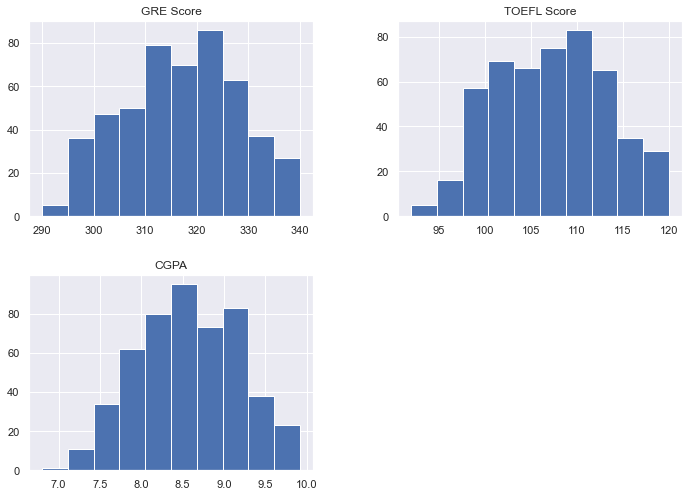

In [7]:
#Visualizing the Data

cdf = df[['GRE Score','TOEFL Score','CGPA']]
cdf.hist()
plt.show()


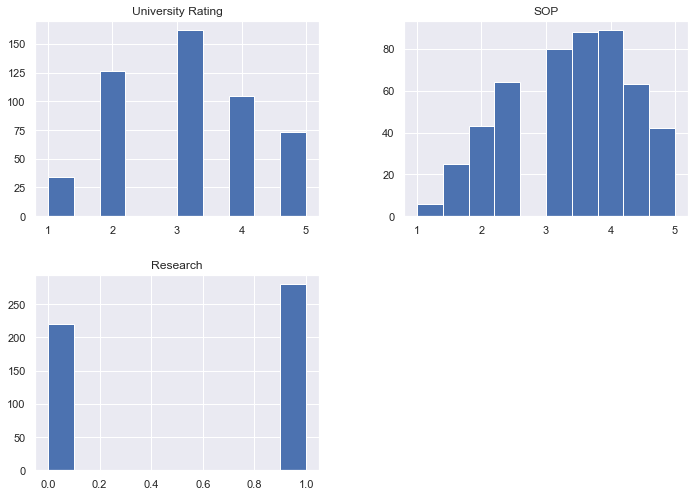

In [8]:
c1df = df[['University Rating','SOP','Research']]
c1df.hist()
plt.show()

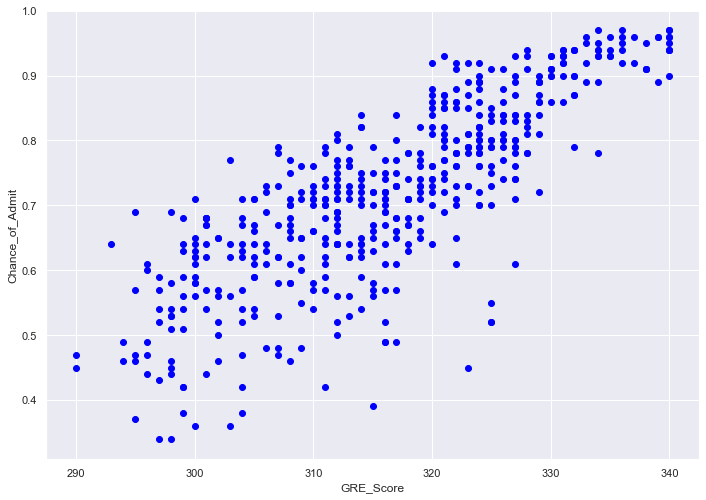

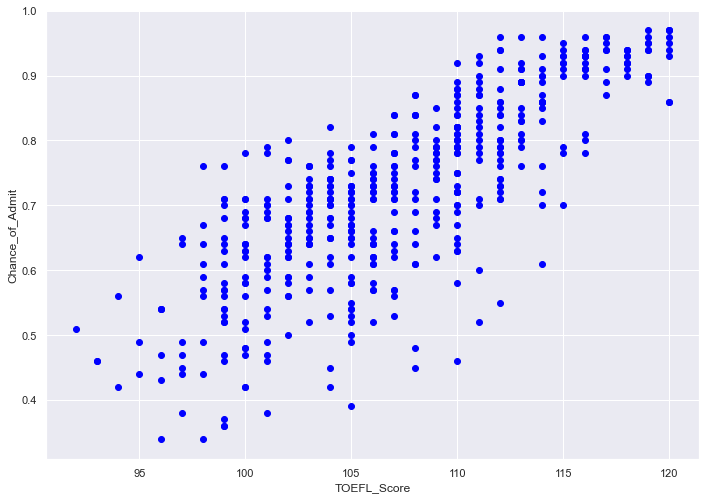

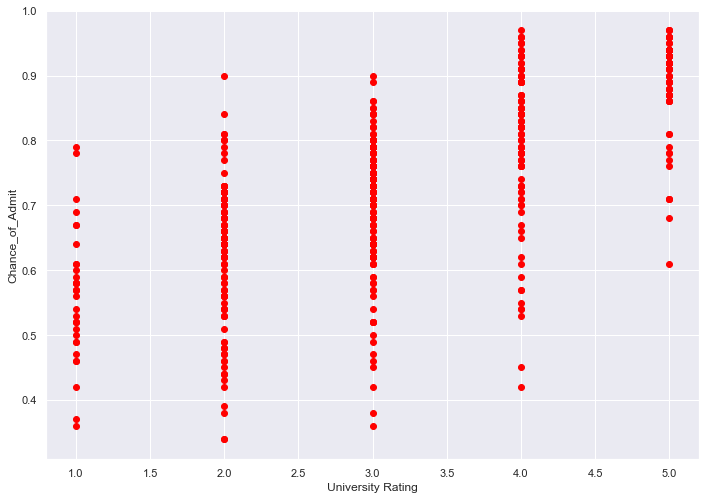

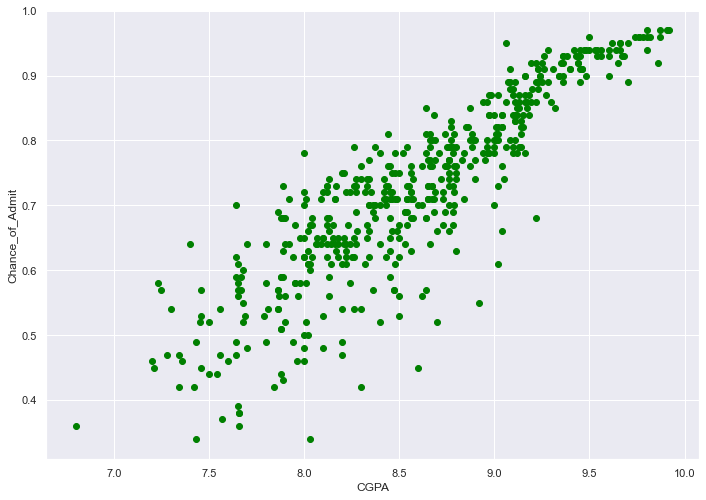

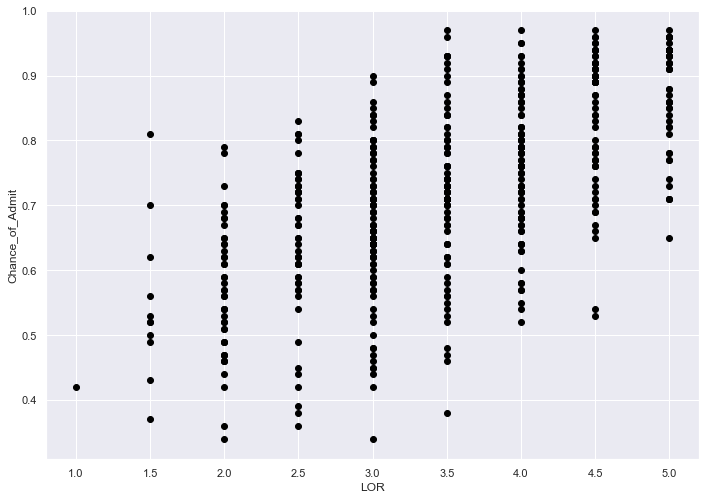

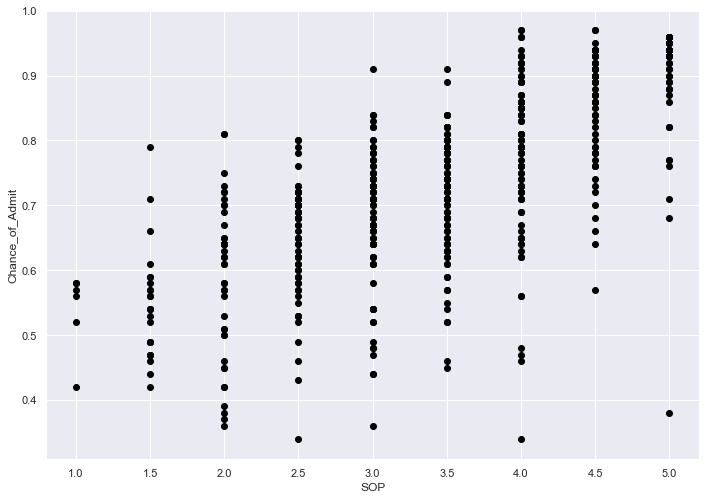

In [9]:
#Visualizing the relationship of each feature with the target value

array = df.values
x = array[:,1]
y = array[:,8]
plt.scatter(x,y,color='blue')
plt.xlabel("GRE_Score")
plt.ylabel("Chance_of_Admit")
plt.show()


x1 = array[:,2]

plt.scatter(x1,y,color='blue')
plt.xlabel("TOEFL_Score")
plt.ylabel("Chance_of_Admit")
plt.show()

array = df.values
x2 = array[:,3]

plt.scatter(x2,y,color='red')
plt.xlabel("University Rating")
plt.ylabel("Chance_of_Admit")
plt.show()

array = df.values
x3 = array[:,6]

plt.scatter(x3,y,color='green')
plt.xlabel("CGPA")
plt.ylabel("Chance_of_Admit")
plt.show()

array = df.values
x4 = array[:,5]

plt.scatter(x4,y,color='black')
plt.xlabel("LOR")
plt.ylabel("Chance_of_Admit")
plt.show()\

array = df.values
x5 = array[:,4]

plt.scatter(x5,y,color='black')
plt.xlabel("SOP")
plt.ylabel("Chance_of_Admit")
plt.show()

<AxesSubplot:>

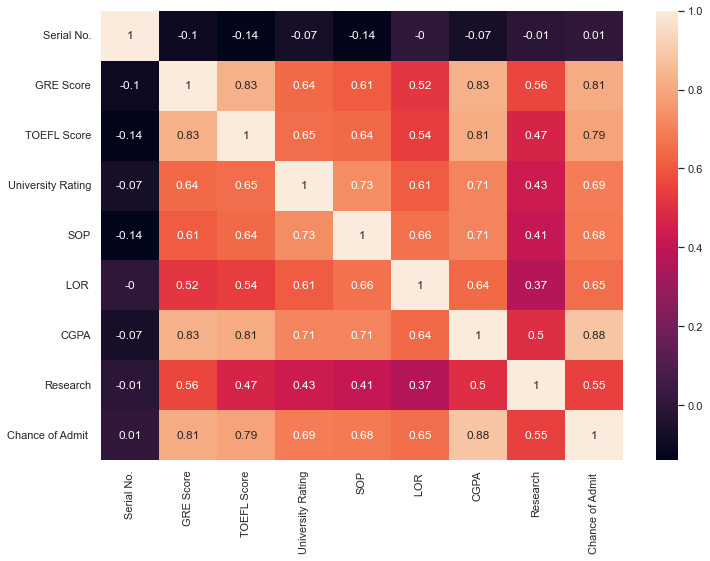

In [10]:
##Checking for Multicollinearity using heatmap
# Correlation Matrix

correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


#As we can see serial number is not needed to predict chance of Admit hence we omit serial No. column in this MLR model

In [11]:
# Using Correlation Maps for determining correlation of feature with target variable = Chance of Admit


In [12]:
# Multiple Linear Regression Model :-

In [13]:
from sklearn.preprocessing import StandardScaler
#Using Standard scaler to standardize the data
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)

In [14]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']]  # Features
y = df['Chance of Admit ']  # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 

c2df = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']]
model.fit(X_train, y_train)


LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mse = rmse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('Mean Squared Error is {}:'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


Mean Squared Error is 0.0037098772519766872:
RMSE is 0.0037098772519766872
R2 score is 0.8211364094801954


The model performance for testing set:


MSE is 0.0029189993928211816
RMSE is 0.05402776501782377
R2 score is 0.8214787365889661


In [17]:
# Predicting for user given value:-

In [18]:
model.predict([[337,118,4,4.5,4.5,9.65,1]])

##this is our first prediction using this model
## the chance of admit for the above given values is 0.951 or 95.1%

C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.95227415])

In [19]:
model.predict([[299,80,2,4.5,3,5.95,0]])

##this is our second prediction using this model
## the chance of admit for the above given values is 0.2574 or 25.74%

C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.2574558])

In [20]:
model.predict([[300,100,3,3,2.5,8.95,1]])

##this is our third prediction using this model
## the chance of admit for the above given values is 0.7113 or 71.13%

C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.71130314])

In [21]:
##Checking the accuracy of our model
##Currently its accuracy is 82.19% as shown below
model.score(c2df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']], df['Chance of Admit '])

0.8213499149486976

In [22]:
model.coef_ 
##these are the values of the coefficients of this MLR model

array([ 0.00177491,  0.00267208,  0.00698668, -0.00051509,  0.01668673,
        0.12516321,  0.02372516])

In [23]:
model.intercept_ 
##This is the value of the intercept of the dependent variable y equation

-1.2934463599013735

In [24]:
#Hence the equation for this model is Y = 0.00185851*Gre Score +  0.00277797*TOEFL Score +  0.00594137*University Rating + 0.00158614*SOP + 0.01685874*LOR + 0.11838505*CGPA +  0.02430748*Research
#From the scatter plots and correlation heatmap we find that GRE Score, TOEFL Score and CGPA are having linear relation with the target variable so we omit the other dependent variables for this model

In [25]:
df=pd.DataFrame({'Actual':'', 'Predicted':y_train_predict})
df

,Actual,Predicted
0,,0.668921
1,,0.622433
2,,0.734473
3,,0.632922
4,,0.767309
...,...,...
395,,0.654308
396,,0.856897
397,,0.836469
398,,0.579956


C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


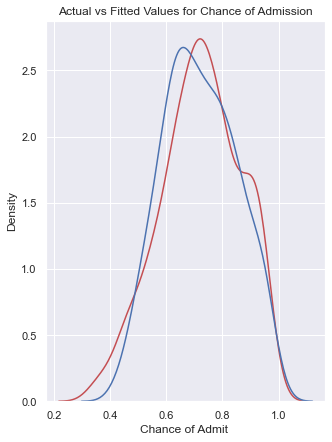

In [26]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_train_predict, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Chance of Admission')


plt.show()
plt.close()

In [27]:
## Multiple Linear Regression with PCA 

In [33]:
from sklearn.decomposition import PCA

In [34]:
#importing the dataset

url = "D:\Downloads\Project_1\Admission_Predict_Ver1.1.csv" 
# replace this URL with file location of where this file is stored on your computer
df = pd.read_csv(url)


print(df.keys())

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [35]:
# Naming the features
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Chance of Admit ']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [36]:
# Determining principal components
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4'])

In [37]:
# Final DF
finalDf = pd.concat([principalDf, df[['Chance of Admit ']]], axis = 1)

In [38]:
finalDf.head()

,PC1,PC2,PC3,PC4,Chance of Admit
0,-3.568375,-0.328318,-0.608675,-0.512976,0.92
1,-1.639199,0.034550,0.867234,-0.105140,0.76
2,0.550991,-0.720794,0.940014,0.066577,0.72
3,-0.345470,-1.280237,-0.390081,0.579390,0.80
4,2.035804,0.039366,-0.691749,-0.616976,0.65


In [39]:
# Variance
pca.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255, 0.0543379 ])

In [40]:
from sklearn.preprocessing import StandardScaler
#Using Standard scaler to standardize the data
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(finalDf)

In [41]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X = finalDf[['PC1', 'PC2','PC3','PC4']]  # Features
y = df['Chance of Admit ']  # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 

c2df = finalDf[['PC1', 'PC2','PC3','PC4']]
model.fit(X_train, y_train)

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mse = rmse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('Mean Squared Error is {}:'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


Mean Squared Error is 0.004136368964742624:
RMSE is 0.004136368964742624
R2 score is 0.8005740474689965


The model performance for testing set:


MSE is 0.003041251692777312
RMSE is 0.055147544757471405
R2 score is 0.8140019844194565


In [44]:
##Checking the accuracy of our model
##Currently its accuracy is 82.19% as shown below
model.score(finalDf[['PC1', 'PC2','PC3','PC4']], df['Chance of Admit '])

0.8029580827377933

In [45]:
df=pd.DataFrame({'Actual':'', 'Predicted':y_train_predict})
df

,Actual,Predicted
0,,0.652305
1,,0.611187
2,,0.726067
3,,0.678628
4,,0.741796
...,...,...
395,,0.644364
396,,0.867057
397,,0.839481
398,,0.604017


C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


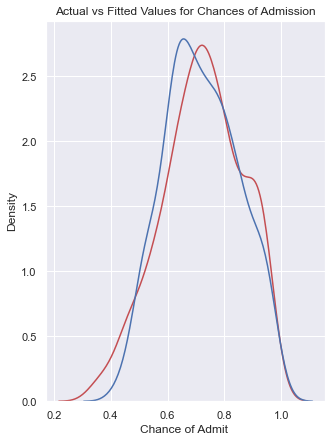

In [46]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_train_predict, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Chances of Admission')


plt.show()
plt.close()

In [47]:
# Random Forest Regression Model

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
#importing the dataset

url = "D:\Downloads\Project_1\Admission_Predict_Ver1.1.csv" 
# replace this URL with file location of where this file is stored on your computer
df = pd.read_csv(url)


print(df.keys())

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [50]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [51]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [52]:
from sklearn.preprocessing import MinMaxScaler
#Using min-max scaler to normalize the data
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)

In [53]:
# Splitting the dataset

X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']]  # Features
y = df['Chance of Admit ']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Chance of Admit '],axis = 'columns'), y, test_size=0.3) # 70% training and 30% test

In [54]:
#Building the random forest regression model
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [55]:
# Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(X_train,y_train)

# Prediction on test set
y_pred = regressor.predict(X_test)

In [56]:
#Testing the model for user defined value: 

In [167]:
regressor.predict([[337,118,4,4.5,4.5,9.65,1]])

C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.92829])

In [57]:
regressor.predict([[298,108,4,4.5,3.5,7,0]])

C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.46076])

In [58]:
# The Chance of Admit for  :
#'GRE Score = 337', 'TOEFL Score = 118', 'University Rating' = 4, 'SOP = 4.5','LOR = 4.5', 'CGPA = 9.65', 'Research = 1' is 92.65 % or 0.9265
#'GRE Score = 198', 'TOEFL Score = 108', 'University Rating' = 4, 'SOP = 4.5','LOR = 3.5', 'CGPA = 7', 'Research = 0' is 51.79 % or 0.5179

In [59]:
#Values and graph for actual versus predicted values:-

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
470,0.87,0.89377
340,0.75,0.69184
410,0.54,0.44507
349,0.62,0.65110
391,0.71,0.69851
...,...,...
448,0.80,0.75373
338,0.81,0.75828
419,0.58,0.61518
151,0.94,0.90706


C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


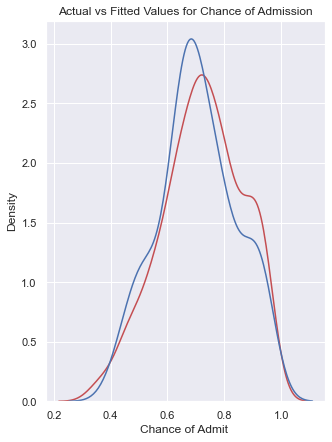

In [60]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Chance of Admission')


plt.show()
plt.close()

In [61]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.004976902627333303
Root Mean Squared Error: 0.07054716597662378


In [62]:
#y_pred = reg.predict(xTest)
print("R2 score : %.6f" % r2_score(y_test,y_pred))

R2 score : 0.749320


In [63]:
# Random Forest Regression with PCA :-

In [64]:
#importing the dataset

url = "D:\Downloads\Project_1\Admission_Predict_Ver1.1.csv" 
# replace this URL with file location of where this file is stored on your computer
df = pd.read_csv(url)


print(df.keys())

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [65]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [66]:
# Naming the features
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Chance of Admit ']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [67]:
# Determining principal components
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3'])

In [68]:
# Final DF
finalDf = pd.concat([principalDf, df[['Chance of Admit ']]], axis = 1)

In [69]:
finalDf.head()

,PC1,PC2,PC3,Chance of Admit
0,-3.568375,-0.328318,-0.608675,0.92
1,-1.639199,0.034550,0.867234,0.76
2,0.550991,-0.720794,0.940014,0.72
3,-0.345470,-1.280237,-0.390081,0.80
4,2.035804,0.039366,-0.691749,0.65


In [70]:
# Variance
pca.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255])

In [71]:
# Splitting the dataset

X = finalDf[['PC1','PC2','PC3']]  # Features
y = finalDf['Chance of Admit ']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop(['Chance of Admit '],axis = 'columns'), y, test_size=0.3) 

In [72]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [73]:
# Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(X_train,y_train)

# Prediction on test set
y_pred = regressor.predict(X_test)

C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Sharon\anaconda3\envs\ML_Learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


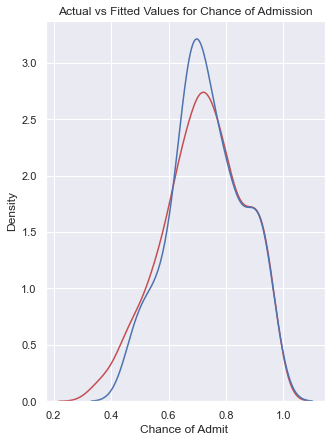

In [74]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Chance of Admission')


plt.show()
plt.close()

In [235]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.005380451291333261
Root Mean Squared Error: 0.07335155956987732


In [244]:
print("R2 score : %.6f" % r2_score(y_test,y_pred))

R2 score : 0.733636
